In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Importo el dataset con pandas
df_original= pd.read_csv('C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Fragua_2023.csv')

# Primer mirada al dataframe
display(df_original.head())

,Marca temporal,Nombre y Apellido,Sexo,Fecha de nacimiento,DNI,Mail,Nro de celular,Círculo,¿A que facultad vas/fuiste?,¿Fuiste a la Misión de Verano 22/23?,¿Tenes apostolado?,¿Cuál?,¿Tenes alguna restricción alimenticia? ¿Cuál?,"¿Tenes alguna propuesta para Fragua? Curso, temas, ideas sugerencias..."
0,1/3/2023 21:33:17,Abril Cobos,Mujer,28/8/2003,45617883,Abril.cobos@hotmail.com,1125662104,Ex Animador,Universidad Austral,Sí,No,NaN,NaN,NaN
1,1/3/2023 21:33:34,Adolfina Medina,Mujer,8/5/2004,45751055,adolfinamedina@icloud.com,1133778822,Ex Animador,Universidad del Salvador,Sí,No,NaN,NaN,NaN
2,1/3/2023 21:33:17,Agostina casañas,Mujer,2/10/2000,42952050,a.casanasongania@usal.edu.ar,1131435280,Sta Maria Magdalena,Universidad del Salvador,Sí,Sí,Hospice / confirmación,No,NaN
3,1/3/2023 21:33:32,Agus Irañeta,Mujer,11/3/2001,43279960,agusiraneta@gmail.com,1123114047,Sta Maria Magdalena,UMSA - Museo social Argentino,No,No,NaN,NaN,NaN
4,1/3/2023 21:36:11,Agustin Garat,Varon,23/4/2002,43987622,tingarat@hotmail.com,1121655359,San Francisco de Asís,Universidad del Salvador,Sí,Sí,Coordinador de circulo,NaN,NaN


In [2]:
# Me quedo solo con las columnas que me importan y las nombro de una forma mas cómoda
df = df_original[['Nombre y Apellido', 'Sexo', 'Fecha de nacimiento', 'DNI', 'Mail', 'Nro de celular', 'Círculo', '¿A que facultad vas/fuiste?', '¿Fuiste a la Misión de Verano 22/23?', ]]
new_cols = {'Nombre y Apellido': 'Nombre', 'Sexo': 'Sexo', 'Fecha de nacimiento': 'Nacimiento', 'DNI': 'DNI', 'Mail': 'Mail', 'Nro de celular': 'Celular', 'Círculo': 'Círculo', '¿A que facultad vas/fuiste?': 'Facultad', '¿Fuiste a la Misión de Verano 22/23?': 'Mision'}
df = df.rename(columns=new_cols)

In [3]:
# Proceso para unificar las respuestas de las facultades
df['Facultad']=df['Facultad'].str.upper()
df['Facultad']=df['Facultad'].str.strip()
print(df['Facultad'].value_counts())

UNIVERSIDAD AUSTRAL              52
UNIVERSIDAD DEL SALVADOR         51
UNIVERSIDAD DE BUENOS AIRES      30
UCA                               7
UNIVERSIDAD DE SAN ANDRÉS         5
UNIVERSIDAD TORCUATO DI TELLA     5
UNIVERSIDAD DE LUJAN              4
UNIVERSIDAD DE PALERMO            4
UNIVERSIDAD DE BELGRANO           3
UADE                              2
USAL                              2
FIUBA                             2
UCES                              2
ITBA                              1
UNA QUE NO ES CONOCIDA            1
UCEMA                             1
USAL (FACULTAD DE MEDICINA)       1
OTT                               1
DI TELLA                          1
UBA                               1
AUSTRAL                           1
SARA C DE ECCLESTON               1
UMSA - MUSEO SOCIAL ARGENTINO     1
UNSTA                             1
Name: Facultad, dtype: int64


In [4]:
# Sigo unificando respuestas
df['Facultad']= df['Facultad'].astype('category')
facs = {
    'UNIVERSIDAD DEL SALVADOR':'USAL',
    'UMSA - MUSEO SOCIAL ARGENTINO':'Otro',
    'UNIVERSIDAD DE BUENOS AIRES': 'UBA',
    'SARA C DE ECCLESTON': 'Otro',
    'UNIVERSIDAD DE SAN ANDRÉS': 'San Andrés', 
    'OTT':'Otro', 
    'USAL (FACULTAD DE MEDICINA)':'USAL',
    'UCEMA':'Otro',
    'Austral':'Austral',
    'UNIVERSIDAD AUSTRAL':'Austral', 
    'UADE':'Otro',
    'UNSTA':'Otro',
    'UNIVERSIDAD TORCUATO DI TELLA':'Di Tella',
    'FIUBA':'UBA',
    'UNIVERSIDAD DE PALERMO':'UP',
    'UNIVERSIDAD DE BELGRANO':'UB',
    'UCES':'Otro',
    'AUSTRAL':'Austral',
    'DI TELLA':'Di Tella',
    'ITBA':'Otro',
    'UNA QUE NO ES CONOCIDA':'Otro',
    'UNIVERSIDAD DE LUJAN':'UNLU'
    }

df['Resumen_facultad']=df['Facultad'].replace(facs)

# Recuento de personas por facultad
stats_fac = df['Resumen_facultad'].value_counts()
print(stats_fac)

USAL          54
Austral       53
UBA           33
Otro          11
UCA            7
Di Tella       6
San Andrés     5
UNLU           4
UP             4
UB             3
Name: Resumen_facultad, dtype: int64


In [5]:
def graficar(stats, title):
    """ Función que grafica 
    """
    colors = sns.color_palette('pastel', len(stats.index)).as_hex()
    plt.pie(stats, labels=stats.index, startangle=30, colors=colors)
    plt.legend(stats, loc= 'right', bbox_to_anchor=(1.5, 0.5))
    plt.title(title)
    plt.show()


In [ ]:
def guardar(nombre):
    """ Función para guardar los gráficos con formato png
    Args:
        Nombre(str): Nombre con el que quiero guardar el gráfico
    Returns: 
        Guarda el gráfico en la ruta de acceso especificada
        Muestra el gráfico guardado
    """
    plt.savefig(f"C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\{nombre}.png", dpi=300, format='png', transparent=True, bbox_inches='tight')
    plt.show()

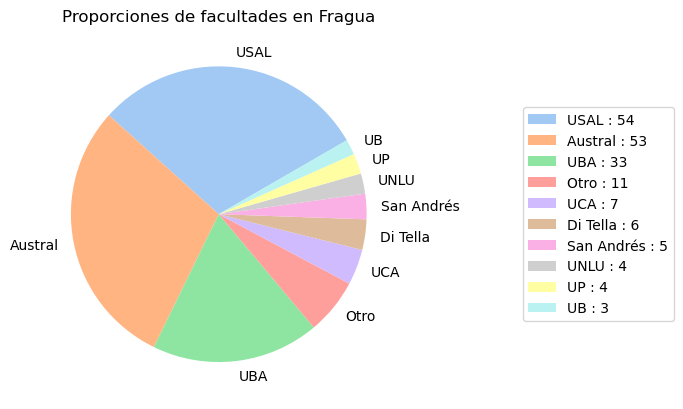

In [6]:
# Grafico un pie chart de las facultades 

title = 'Proporciones de facultades en Fragua'
colors = sns.color_palette('pastel', len(stats_fac.index)).as_hex()   #Creo una paleta de colores pastel

plt.pie(stats_fac, labels=stats_fac.index, startangle=30, colors=colors)

legend = []
for i in range(len(stats_fac)): #Creo la leyenda
    legend.append(f'{stats_fac.index[i]} : {stats_fac[i]}')
plt.legend(legend, loc= 'right', bbox_to_anchor=(1.75, 0.5))
plt.title(title)

#guardar('Stats_Facultades')
plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Facultades.png", dpi=300, format='png', transparent=True, bbox_inches='tight')
plt.show()

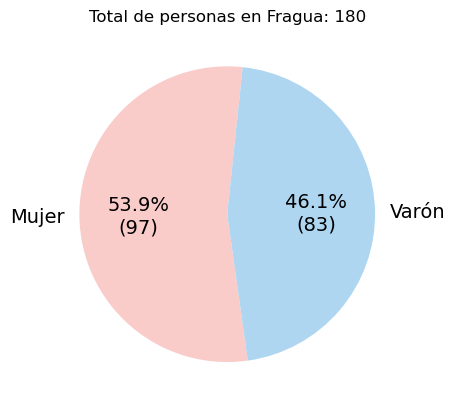

In [7]:
# Calcula las estadísticas de sexo
stats_sexo = df['Sexo'].value_counts()
total = stats_sexo['Varon'] + stats_sexo['Mujer']
title = f'Total de personas en Fragua: {total}'

# Configuración del gráfico de pastel
colors = ['#F9CCCA', '#AED6F1']
labels = ['Mujer', 'Varón']
sizes = [stats_sexo['Mujer'], stats_sexo['Varon']]
autopct_format = lambda pct: f'{pct:.1f}%\n({int(round(pct * total / 100))})'

# Genera el gráfico de pastel
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format, textprops={'fontsize': 14}, startangle=84)
plt.title(title)

#guardar('Stats_Sexo')

# Guarda el gráfico en un archivo
plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Sexo.png", dpi=300, format='png', transparent=True, bbox_inches='tight')

# Muestra el gráfico
plt.show()

C:\Users\tpere\AppData\Local\Temp\ipykernel_9276\4065868002.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Nacimiento'] = pd.to_datetime(df['Nacimiento'])


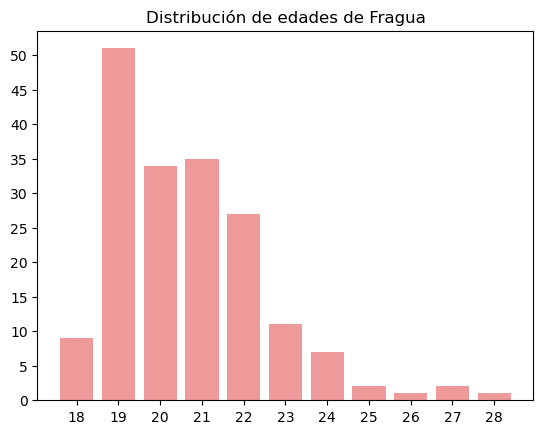

In [8]:
today = pd.Timestamp(dt.date.today())  #Fecha de hoy
df['Nacimiento'] = pd.to_datetime(df['Nacimiento'])  #Columna de nacimiento dtype datetime

# Calculo las edades
df['Edad'] = (today - df['Nacimiento']).astype('<m8[Y]')

# Cuento cantidad de personas por edad y ordeno ascendente
stats_edad = df['Edad'].value_counts().astype('int')
stats_edad = stats_edad.sort_index(ascending=True)

# Grafico
plt.bar(stats_edad.index,stats_edad, color='#EF9A9A')
xticks = range(round(min(stats_edad.index)), round(max(stats_edad.index))+1, 1)
plt.xticks(xticks)
plt.yticks(range(0, max(stats_edad)+1, 5))
plt.title('Distribución de edades de Fragua')

#Guardo
#guardar('Stats_Edades')

plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Edades.png", dpi=300, format='png', transparent=True, bbox_inches='tight')

plt.show()

## Apostolado

In [ ]:
stats_apostolado = df_original['¿Tenes apostolado? '].value_counts()
total = stats_apostolado['No'] + stats_apostolado['Sí']
si = stats_apostolado['Sí']
titulo = f'Apostolado (a principio de año): {si} de {total}'
plt.pie(stats_apostolado,labels=stats_apostolado.index,colors=['#FFCCCB','#CCCCFF'], autopct='%1.1f%%', textprops={'fontsize':14}, startangle=55)
plt.title(titulo)
plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Apostolados.png", dpi=300, format='png', transparent=True, bbox_inches='tight')
plt.show()

## Personas por círculo

In [ ]:
# Cuento personas por círculo
stats_circ = df['Círculo'].value_counts()
#print(stats_circ)
circulos = {
    'Alpha':'Ex Animador',
    'Círculo de Domna': 'San Juan'
}
df['Círculo']=df['Círculo'].replace(circulos)
stats_circ = df[['Círculo','Sexo']]
#print(stats_circ.groupby('Círculo').value_counts())
#display(df[stats_circ['Círculo'] == 'San José'])

#Hubo un error de ingreso de datos que tengo que cambiar

stats_circ.loc[106, 'Círculo'] = 'San Francisco de Asís'

#Agrupo por círculo y cuento personas 
circs=stats_circ.groupby('Círculo').value_counts()
circs = circs.reset_index()

#Separo ex animadores verones y mujeres
circs.loc[circs['Círculo'] == 'Ex Animador', 'Círculo'] = 'Ex Animador Mujeres'
circs.loc[(circs['Círculo'] == 'Ex Animador Mujeres') & (circs['Sexo'] == 'Varon'), 'Círculo'] = 'Ex Animador Varones'


#Definir colores para cada sexo
colores = {'Varon': 'skyblue', 'Mujer': 'lightpink'}

# Graficar los datos del DataFrame
plt.barh(circs['Círculo'], circs[0], color=[colores[sexo] for sexo in circs['Sexo']])

# Agregar etiquetas y título
plt.title('Cantidad de Personas por Círculo')
plt.xticks([])

# Excribo el número que representa la cantidad de personas en cada barra
for i, value in enumerate(circs[0]):
    plt.text(value, i, str(value), ha='left', va='center')
    
# Agrego leyenda
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colores['Mujer']), plt.Rectangle((0,0),1,1, color=colores['Varon'])], labels=['Mujeres', 'Varones'], loc='upper right', facecolor='white', framealpha=1, frameon=True)

plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Circulos.png", dpi=300, format='png', transparent=True, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


## Asistencias
Asistencias es un dataset que contiene las asistencias por grupo (çírculo) todos los miércoles. Hay valores que no están asignados porque el encargado de tomar asistencia no lo hizo

In [4]:
# Dataset de asistencias por círculo (estimado)
asistencias = pd.read_csv("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Asistencias_26-5.csv", delimiter= ";")
display(asistencias.head())

,Círculo,6/3,13/3,20/3,27/3,10/4,17/4,24/4,1/5,8/5,15/5,22/5,TOTAL,67
0,Beato Carlo Acuttis,85.0,71,71.0,85.0,85.0,57.0,85.0,57.0,57.0,71.0,85.0,74,NaN
1,Sagrado Corazón de Jesús,42.0,42,42.0,83.0,83.0,83.0,66.0,66.0,66.0,66.0,66.0,64,NaN
2,San Alberto Hurtado,100.0,87,NaN,90.0,NaN,90.0,100.0,90.0,90.0,80.0,90.0,91,NaN
3,San Antonio de Padua,44.0,66,55.0,33.0,66.0,66.0,44.0,55.0,NaN,NaN,55.0,54,NaN
4,San Damian de Molokai,53.0,73,66.0,58.0,52.0,68.0,62.0,NaN,62.0,56.0,62.0,61,NaN


#### Porcentaje total de asistencias

In [12]:
# Calculo el porcentaje total de asistencias
total = asistencias['TOTAL'].sum()/asistencias['TOTAL'].count()

In [15]:
maxima_asistencia= asistencias.sort_values(by='TOTAL',ascending=False)['Círculo'].head(1)[2]
print(f'Círculo con máxima asistencia: {maxima_asistencia}')

Círculo con máxima asistencia: San Alberto Hurtado


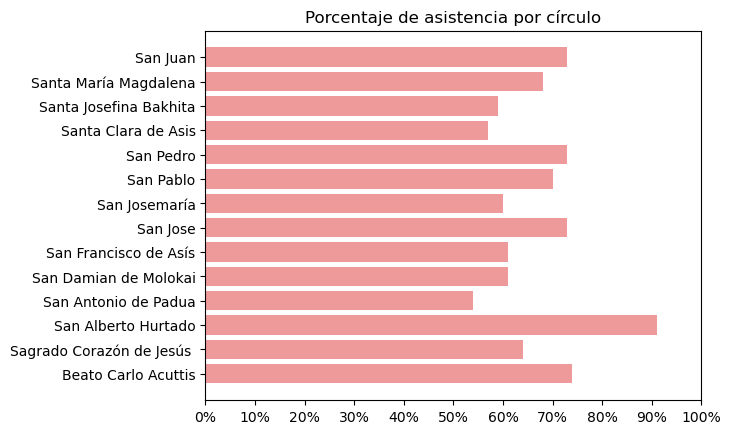

In [15]:
# Importo ticker porque lo necesito para poner el % en los xticks
import matplotlib.ticker as ticker

#Grafico
plt.barh(asistencias['Círculo'],asistencias['TOTAL'], color='#EF9A9A')
plt.xticks(range(0, max(asistencias['TOTAL']) + 10, 10))
formatter = ticker.PercentFormatter()
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Porcentaje de asistencia por círculo')

#guardar('Stats_Asistencias')

#Guardo
plt.savefig("C:\\Users\\tpere\\Documents\\Fragua\\Estadisticas_Fragua\\Stats_Asistencias.png", dpi=300, format='png', transparent=True, bbox_inches='tight')

plt.show()